In [6]:
from astropy.io.fits import hdu
from Spectra import *
from SpectraData import *
from Inventory import *
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from rescaleSky import *
import glob 
from mergeExpositions import *
from HighSeeing import HighSeeing_Filter
import warnings
from astropy.stats import sigma_clip
import seaborn as sns
from Tools import *
import pandas
from FluxLims import *

plt.style.use("seaborn-poster")
warnings.filterwarnings('ignore')
catalog=ascii.read("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/Binospec-Candels.cat")


In [7]:
#Select LBGS without Lya
def getNonDetectionLBGs(mask_name,cat):
    NamesnonDetect    =   nonDetections(pandas.read_csv('../../Docs/'+mask_name+'.csv',sep=";"),cat)[1]
    fname_data=readDataLBG("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/data/large_files/Reduced_Data/"+mask_name+"/2D/noiseCorrected/*.fits")
    mask=[True if s.Data.header["SLITOBJ"] in NamesnonDetect else False for s in fname_data ]
    fname_data=fname_data[mask]
    return fname_data

def nonDetections(df,catalog):
    """"
    Reads the catalogs and gets whatever doesnt have a lyman detection (only Include possible LAES)
    normally should be an X or other type of text

    df : csv file
    
    returns:
    Ids of non detections
    """
    mascara=[]
    for name in df["name"].values:
        if "HST" not in name and "f_" not in name:
            mascara.append(True)
        else: 
            mascara.append(False)
    df=df[mascara]
    Mask=[]
    names=df["name"].values

    NDnames=[]
    for n in names:
        found=" "
        for c in catalog:
            if n==c["id_charlotte"]:
                found=c
        if found==" ":
            print("Not found")
            Mask.append(False)
            continue
                
        if found["Type"]=="LAE":
            Mask.append(False)
        if found["Type"]=="NonDetect":
            Mask.append(True)
            NDnames.append(found["id_charlotte"])
    return Mask,NDnames

NLya1   =   getNonDetectionLBGs("Mask1",catalog)
NLya2   =   getNonDetectionLBGs("Mask2_1",catalog)
NLya3   =   getNonDetectionLBGs("Mask2_2",catalog)
NLya4   =   getNonDetectionLBGs("Mask2_3",catalog)

Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found


In [ ]:
#Select LBGS without Lya
def getNonDetectionLBGs(mask_name,cat):
    NamesnonDetect    =   nonDetections(pandas.read_csv('../../Docs/'+mask_name+'.csv',sep=";"),cat)[1]
    fname_data=readDataLBG("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/data/large_files/Reduced_Data/"+mask_name+"/2D/noiseCorrected/*.fits")
    mask=[True if s.Data.header["SLITOBJ"] in NamesnonDetect else False for s in fname_data ]
    fname_data=fname_data[mask]
    return NamesnonDetect

def nonDetections(df,catalog):
    """"
    Reads the catalogs and gets whatever doesnt have a lyman detection (only Include possible LAES)
    normally should be an X or other type of text

    df : csv file
    
    returns:
    Ids of non detections
    """
    mascara=[]
    for name in df["name"].values:
        if "HST" not in name and "f_" not in name:
            mascara.append(True)
        else: 
            mascara.append(False)
    df=df[mascara]
    Mask=[]
    names=df["name"].values

    NDnames=[]
    for n in names:
        found=" "
        for c in catalog:
            if n==c["id_charlotte"]:
                found=c
        if found==" ":
            continue
                
        if found["Type"]=="LAE":
            NDnames.append(found)
        if found["Type"]=="NonDetect":
            NDnames.append(found)
    return Mask,NDnames
"""
NLya1   =   getNonDetectionLBGs("Mask1",catalog)
NLya2   =   getNonDetectionLBGs("Mask2_1",catalog)
NLya3   =   getNonDetectionLBGs("Mask2_2",catalog)
NLya4   =   getNonDetectionLBGs("Mask2_3",catalog)
"""

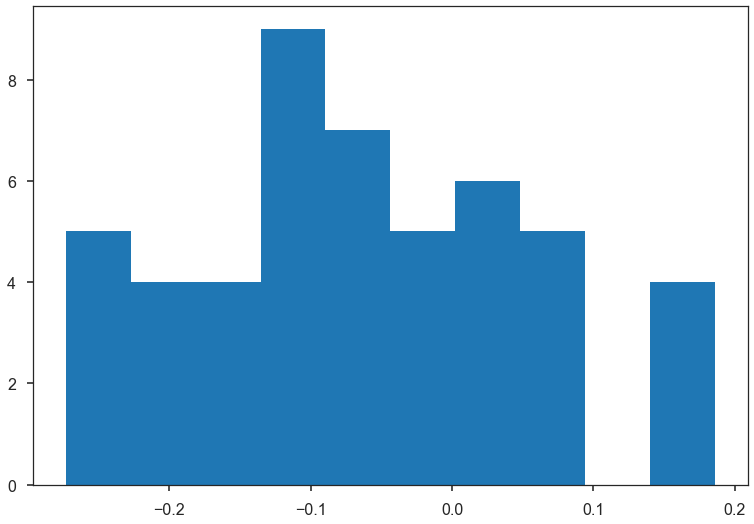

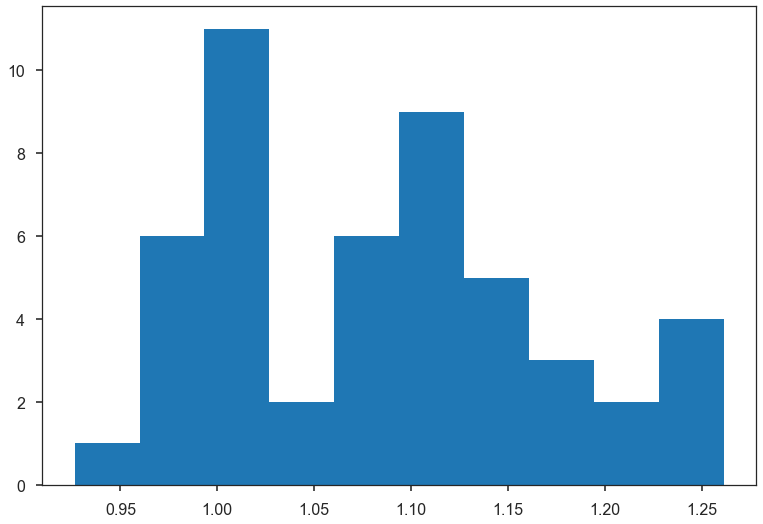

In [8]:
wave=np.arange(6760.0,6760.0+5631*0.620000004768,0.620000004768)
Wavemask= (  ( (wave > 7893.) & (wave < 7908.) ) | ( (wave > 8106.) & (wave < 8271.) ) \
| ( (wave > 8314.) & (wave < 8337.) ) | ( (wave > 8469.) & (wave < 8489.) ) | ( (wave > 8508.) & (wave < 8534.) ) \
| ( (wave > 8552.) & (wave < 8754.) ) | ( (wave > 8795.) & (wave < 8821.) )  )

means=[]
stds=[]

for gal in NLya3:
    gal=gal.Data
    dat=gal.rawData[:,Wavemask]
    err=gal.error[:,Wavemask]

    dat[dat == 0.0] = np.nan
    err[dat == 0.0] = np.nan

    signal=dat.flatten()*0.8
    noise=err.flatten()*0.8
    SNR=signal/noise
    SNR=SNR[(SNR<5) & (SNR>-5)]
    mean=np.nanmean(SNR)
    std=np.nanstd(SNR)

    if np.abs(mean)>0.5:
        print(gal.header["SLITOBJ"])
        plt.hist(SNR,bins=200,range=(-5,5))
        plt.axvline(mean,color="red",label="Mean")
        plt.axvline(mean+std,color="green",label="Mean+std")
        plt.axvline(mean-std,color="green",label="Mean-std")
        plt.legend()
        plt.show() 


    means.append(mean)
    stds.append(std)

plt.hist(means,bins=10)
plt.show()
plt.hist(stds,bins=10)
plt.show()


In [9]:
id1=[gal["id_charlotte"] for gal in NLya1]
id2=[gal["id_charlotte"] for gal in NLya2]
id3=[gal["id_charlotte"] for gal in NLya3]
id4=[gal["id_charlotte"] for gal in NLya4]
x=np.load("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/measurements/FluxLims.npy",allow_pickle=True)
x = dict(x.item())


TypeError: 'Spectra' object is not subscriptable

In [ ]:
# Search for elements of id1 in x and print the results
els=[]
for element in id1:
    try:
        els.append(x[element])
    except:
        continue
    
e1=np.nanmedian(els)
print(10**np.nanmedian(els))


# Search for elements of id2 in x and print the results
els2 = []
for element in id2:
    try:
        els2.append(x[element])
    except:
        continue

e2=np.nanmedian(els2)
print(10**np.nanmedian(els2))

# Search for elements of id3 in x and print the results
els3 = []
for element in id3:
    try:
        els3.append(x[element])
    except:
        continue
e3=np.nanmedian(els3)
print(10**np.nanmedian(els3))

# Search for elements of id4 in x and print the results
els4 = []
for element in id4:
    try:
        els4.append(x[element])
    except:
        continue
e4=np.nanmedian(els4)
print(10**np.nanmedian(els4))


print(np.nanmean([e1,e2,e3,e4]))

In [10]:
tLAE=0
tnonLAE=0
for gal in NLya4:
    if gal["Type"]=="LAE":
        tLAE+=1
    if gal["Type"]=="NonDetect":
        tnonLAE+=1

print(tLAE,tnonLAE)

TypeError: 'Spectra' object is not subscriptable

In [11]:
####################
LinePixLocations=[1401,1646,1823,2023,2237,2644,2670,2885,3399,4322,4903,5088,5226]

def GetFWHMres(Specs,Skylinepix,range=7,resolution=0.62):
    errors=[s.Data.error for s in Specs]
    errors1D=[np.median(e,axis=0) for e in errors]
    xvalues=np.linspace(-10,10,range*2)
    FWHMres=[]
    for gal in errors1D[:]:
        fwhms=[]
        for l in Skylinepix:
            normFlux=gal[l-range:l+range]/max(gal[l-range:l+range])
            initialParams=[1,0,0.5,0.3]
            params=FitGaussian(xvalues,normFlux,np.sqrt(normFlux),*initialParams)
            fwhms.append(2.355*params[2])
            #print(2.355*params[2])
            #print(params)
            #plt.plot(xvalues,gaussian_ML(xvalues,*params))
            #plt.plot(xvalues,normFlux)
            #plt.show()
        FWHMres.append(np.median(fwhms))
    return np.array(FWHMres)*resolution

fwhmres1    =   GetFWHMres(NLya1,LinePixLocations)
fwhmres2    =   GetFWHMres(NLya2,LinePixLocations)
fwhmres3    =   GetFWHMres(NLya3,LinePixLocations)
fwhmres4    =   GetFWHMres(NLya4,LinePixLocations)






In [15]:

def fluxLimEquation(data,FWHMres,sn,res):
    wave=np.arange(6760.0,6760.0+5631*0.620000004768,0.620000004768)
    mask=np.where((wave>8000) & (wave<9000))
    dat=data.rawData
    err=data.error
    #dat[dat==0.0]=np.nan #make all the 0s into nans
    SIGMA   =   np.nanstd(dat,axis=0)[mask]
    fLim    =   5*np.sqrt(2*FWHMres/res)*SIGMA*res
    med,std=np.median(fLim),np.std(fLim)
    for i in range(0,len(fLim)): #change 0s for nans
        if fLim[i]<med-0.3*med:
            fLim[i]=np.nan
    return fLim


FluxLimit1  =   np.nanmean([fluxLimEquation(NLya1[i].Data,fwhmres1[i],5,0.62) for i in range(0,len(fwhmres1))],axis=0)
FluxLimit2  =   np.nanmean([fluxLimEquation(NLya2[i].Data,fwhmres2[i],5,0.62) for i in range(0,len(fwhmres2))],axis=0)
FluxLimit3  =   np.nanmean([fluxLimEquation(NLya3[i].Data,fwhmres3[i],5,0.62) for i in range(0,len(fwhmres3))],axis=0)
FluxLimit4  =   np.nanmean([fluxLimEquation(NLya4[i].Data,fwhmres4[i],5,0.62) for i in range(0,len(fwhmres4))],axis=0)


#Steps: 
#First get the FWHMresolution from skylines in error file. Pick like 10 of them and just fit a gaussian ; Done
#Then do sqrt of the signal and take it to 1D median



In [16]:
print(np.nanmean(FluxLimit1))
print(np.nanmean(FluxLimit2))
print(np.nanmean(FluxLimit3))
print(np.nanmean(FluxLimit4))

1.1524810662301337e-18
1.2656521323105577e-18
1.7346645673329917e-18
1.7462979753205015e-18


In [17]:
with open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/measurements/FluxLims_Nov21.npy", "rb") as f:
    Fluxlimits = np.load(f, allow_pickle=True).item()
medians=[]
for key, values in Fluxlimits.items():
    median_value = np.nanmedian(values)
    #print(f"{key}: {median_value}")
    medians.append(median_value)

def get_flux_lims(NLya, Fluxlimits):
    # Get all IDs from NLya
    ids_nlya = [gal.Data.header["SLITOBJ"] for gal in NLya]

    # Crossmatch with Fluxlimits to get the median flux limit
    flux_lims = []
    for gal_id in ids_nlya:
        if gal_id in Fluxlimits:
            flux_lims.append(np.nanmedian(Fluxlimits[gal_id]))

    return flux_lims

# Get flux limits for NLya1, NLya2, NLya3, and NLya4
flux_lims_nlya1 = get_flux_lims(NLya1, Fluxlimits)
flux_lims_nlya2 = get_flux_lims(NLya2, Fluxlimits)
flux_lims_nlya3 = get_flux_lims(NLya3, Fluxlimits)
flux_lims_nlya4 = get_flux_lims(NLya4, Fluxlimits)

# Print the minimum flux limits
print(np.nanmean(flux_lims_nlya1))
print(np.nanmean(flux_lims_nlya2))
print(np.nanmean(flux_lims_nlya3) * 0.8)
print(np.nanmean(flux_lims_nlya4))


FluxLimit1=np.nanmean(flux_lims_nlya1)
FluxLimit2=np.nanmean(flux_lims_nlya2)
FluxLimit3=np.nanmean(flux_lims_nlya3) * 0.8
FluxLimit4=np.nanmean(flux_lims_nlya4)


6.983570985821551e-18
7.181727206786628e-18
7.931637737545079e-18
9.921356756065357e-18


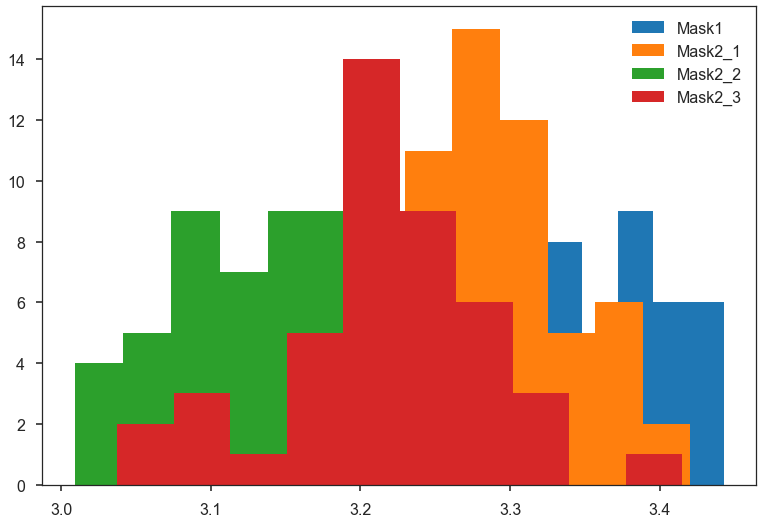

In [18]:
plt.hist(fwhmres1,label="Mask1")
plt.hist(fwhmres2,label="Mask2_1")
plt.hist(fwhmres3,label="Mask2_2")
plt.hist(fwhmres4,label="Mask2_3")
plt.legend()
plt.show()

In [19]:
print(np.nanmean(FluxLimit1))
print(np.nanmean(FluxLimit2))
print(np.nanmean(FluxLimit3)*0.8)
print(np.nanmean(FluxLimit4))

print(np.log10(np.nanmean(FluxLimit1)))
print(np.log10(np.nanmean(FluxLimit2)))
print(np.log10(np.nanmean(FluxLimit3) * 0.8))
print(np.log10(np.nanmean(FluxLimit4)))

6.983570985821551e-18
7.181727206786628e-18
6.345310190036063e-18
9.921356756065357e-18
-17.15592244802717
-17.143771095288656
-17.197547142595564
-17.00342893355332


In [20]:
len(NLya2)

64

In [21]:
1.3626509411460982e-18
1.518419359703428e-18
2.057397195368291e-18
2.4744343867768937e-18

2.4744343867768937e-18

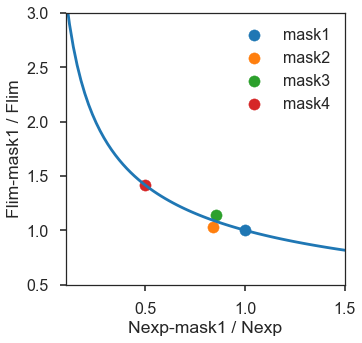

In [22]:
Exp1,Exp2,Exp3,Exp4=63-1,66-14,56-3,40-9
plt.rcParams["figure.figsize"] = (5,5)
Flim1,Flim2,Flim3,Flim4=FluxLimit1,FluxLimit2,FluxLimit3,FluxLimit4

flim=np.array([Flim1,Flim2,Flim3,Flim4])/Flim1
Nexp=np.array([Exp1,Exp2,Exp3,Exp4])/Exp1

x=np.linspace(0.1,2,100)
plt.scatter(Nexp[0],flim[0],label="mask1")
plt.scatter(Nexp[1],flim[1],label="mask2")
plt.scatter(Nexp[2],flim[2],label="mask3")
plt.scatter(Nexp[3],flim[3],label="mask4")
plt.plot(x,1/np.sqrt(x))
plt.xlim(0.1,1.5)
plt.ylim(0.5,3)
plt.xlabel("Nexp-mask1 / Nexp")
plt.ylabel("Flim-mask1 / Flim")
plt.legend()
plt.show()


In [24]:
print(Exp1*900,Exp2*900,Exp3*900,Exp4*900)

55800 46800 47700 27900


ValueError: x and y must have same first dimension, but have shapes (5632,) and (1,)

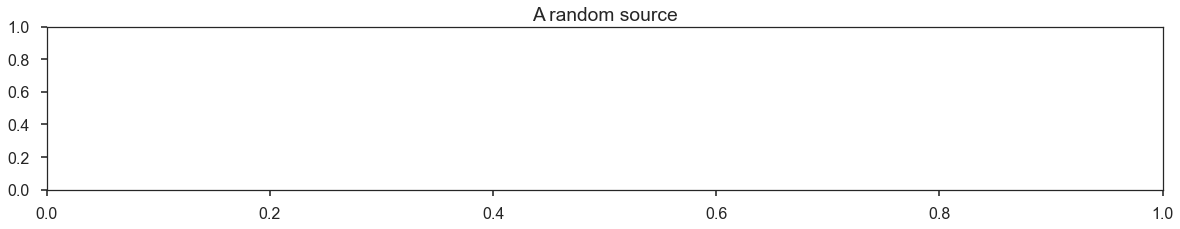

In [25]:

wave=np.arange(6760.0,6760.0+5631*0.620000004768,0.620000004768)
plt.rcParams["figure.figsize"] = (20,3)
plt.title("A random source")
#plt.plot(wave,FluxLimit1,label="mask1")
#plt.plot(wave,FluxLimit2,color="black",label="mask2")
plt.plot(wave,FluxLimit3,label="mask3")
plt.plot(wave,FluxLimit4,label="mask4",alpha=0.4)
#plt.axhline(y=np.median(FluxLimit1[0]))
plt.ylim(-0.01e-17,0.25e-17)
plt.xlabel("Pixel")
plt.ylabel("Flux ergscm2")
plt.legend(loc="best")
plt.show




[1.56412154 1.56419327 1.56426499 ... 1.92601054 1.92606878 1.92612703]


<function matplotlib.pyplot.show(close=None, block=None)>

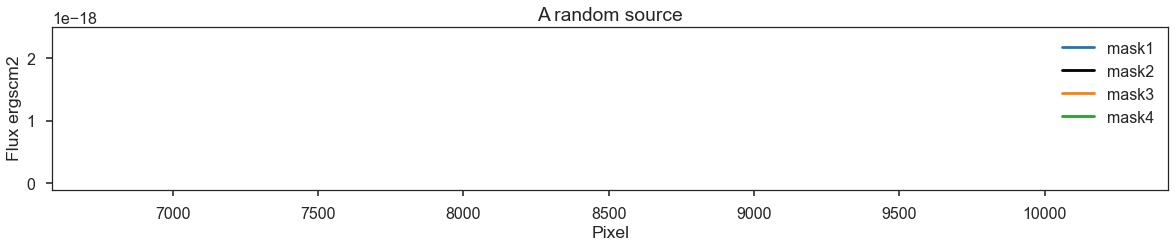

In [26]:
proport=np.sqrt(kmsToangstrom(380.0,wave)/3.5)
print(proport)
wave=np.arange(6760.0,6760.0+5631*0.620000004768,0.620000004768)
plt.rcParams["figure.figsize"] = (20,3)
plt.title("A random source")
plt.plot(wave,FluxLimit1*proport,label="mask1")
plt.plot(wave,FluxLimit2*proport,color="black",label="mask2")
plt.plot(wave,FluxLimit3*proport,label="mask3")
plt.plot(wave,FluxLimit4*proport,label="mask4")
#plt.axhline(y=np.median(FluxLimit1[0]))
plt.ylim(-0.01e-17,0.25e-17)
plt.xlabel("Pixel")
plt.ylabel("Flux ergscm2")
plt.legend(loc="best")
plt.show


In [27]:
import random

def addAtPos(mat1, mat2, xypos):
    """
    Add two matrices of different sizes in place, offset by xy coordinates
    Usage:
      - mat1: base matrix
      - mat2: add this matrix to mat1
      - xypos: tuple (x,y) containing coordinates
    """
    x, y = xypos
    ysize, xsize = int(mat2.shape[0]/2),int(mat2.shape[1]/2)
    #xmax, ymax = (x + xsize), (y + ysize)
    try:
        for i in np.transpose(mat1[y-ysize:y+ysize, x-xsize:x+xsize]):
            if np.sum(i)==0.0:
                return [None]
                
        mat1[y-ysize:y+ysize, x-xsize:x+xsize] += mat2
        return mat1
    except:
        return [None]

def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.
    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius. 

    ##Need to fix FWHM with what was discussed with Charlotte###


    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 / fwhm**2 + (y-y0)**2 / 5**2 ) ) # 5 is the typical line width in x axis

def LineSelection(Specs,SkyLines,width=5,SNRthresh=3,PIXthresh=3,scanArea=5,remove=False):
    data_dir = 'data/'
    """
        Its really the same code that I used before but in function form. In this case it locates the lines by collapsing Yaxis in width.
        Scan area will remove the 5pix from the edges. When both treshholds are met, we are left with a Possiblew source detection.
        
        Args:

            Specs: Spectra Object
            width: Yaxis size to be collapsed
            SNRthresh: Signal to noise to be labeled as a possible detection
            Pixthresh: Amount of continious pixels needed above SNR thresh
            scanArea: size of borders to ignore
            remove: Used when we want to ignore a given list of possible line coordinates
            
        Returns:
            List of Possible lines                                   
    """    
    PossibleLines=[]
    for s in Specs[:]:
        lineData={}
        lineData["ID"]=s.ID

        originalY=np.shape(s.Data.rawData)[0]/2
        foundCandidates=[]

        for y in np.arange(-scanArea,scanArea+1):
            d,e=s.Data.collapse(ywidth=width,YPIX=originalY+y)
            SNR=d/e
            consecutiveSigmas=0

            for i in range(0,len(SNR)):
                if SNR[i]>=SNRthresh and SkyLines[i]==True:
                    consecutiveSigmas+=1

                elif consecutiveSigmas>=PIXthresh:
                    foundCandidates.append((i-1,originalY+y))
                    consecutiveSigmas=0

                else:
                    consecutiveSigmas=0

        if remove==False:
            lineData["Candidates"]=foundCandidates
        
        if remove!=False:
            newfound=[]
            for i in foundCandidates:
                if i not in remove:
                    newfound.append(i)
            lineData["Candidates"]=newfound
            
        PossibleLines.append(lineData)
        return PossibleLines



# FWHM Distribution random sampler


17.5 332.5


array([146.87894798, 212.61286491, 108.08741389, 192.73796226,
       148.13920757, 138.40307625,  95.87561067, 117.71168723,
        85.95403606, 256.21507376])

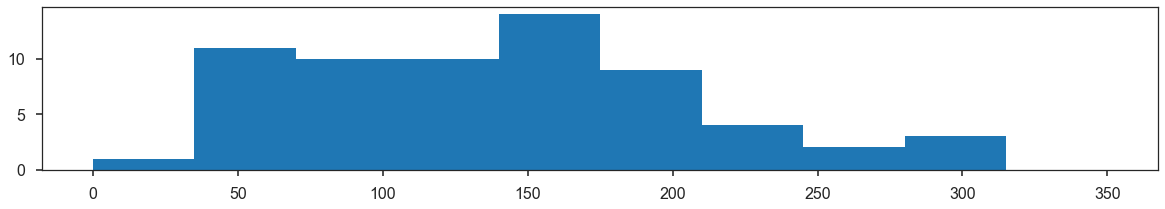

In [28]:
Catalog=ascii.read("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/Binospec-Candels.cat")
fwhmDist=np.array(list(Catalog["LyaFWHM"]))
import numpy.polynomial.polynomial as poly

def RandomSampler(dist,N_points=50):
    counts,bins,__=plt.hist(dist,bins=10,range=[0,350])
    bins=[(bins[i]+bins[i+1])/2 for i in range(0,len(bins)-1)]
    x=np.linspace(30,350,10000)
    coefs = poly.polyfit(bins, counts, 5)
    ffit = poly.Polynomial(coefs) 
    print(bins[0],bins[-1])
    peak=max(ffit(x))
    cex= np.zeros(N_points)
    cey= np.zeros(N_points)
    Ntry = 0
    r = np.random
    for i in range(N_points):
        while True:
            Ntry += 1
            x2 = r.uniform(30, 350)  
            y2 = r.uniform(0, peak)        
            if (y2 < ffit(x2)) :   # If the (x,y)-point fulfills the accept condition...
                break
                
        cex[i] = x2 
        cey[i] = y2   
    
    #plt.scatter(cex,cey,s=0.4,color="red",zorder=10)
    #plt.plot(x,ffit(x))
    #plt.xlabel("FWHM km/s")
    #plt.show()
    return cex



RandomSampler(fwhmDist,N_points=10)

## FLUX LIMITS: METHOD 2, SIMULATE GAUSSIANS

In [ ]:
# First run on slit normally

import copy


def FluxLimits(data,z):
    SkyLines    =   GetStrongSky()
    pixScale=0.62 #1 pixel is this amount of Angstroms
    N = 120  # kernel size
    wave=np.arange(6760.0,6760.0+5631*0.620000004768,0.620000004768)
    maskSkyLines=[]
    for w in wave:
        temp=True
        for s in SkyLines:
            if w>=s-(3.0*0.62) and w<=s+(3.0*0.62):
                temp=False
        maskSkyLines.append(temp)

    gridFlux=10**np.arange(-18,-16.5,0.1) #FLux grid real range is -17.4 to -16, so I will go lower to -18


    
    strip_center = data[0].Data.rawData[len(data[0].Data.rawData) // 2]
    first_non_nan_index = next((i for i, x in enumerate(strip_center) if not np.isnan(x)), None)
    first_non_nan_wave = wave[first_non_nan_index] if first_non_nan_index is not None else None
    print("First non-nan value index in strip_center:", first_non_nan_index)
    print("Corresponding wave:", first_non_nan_wave)
    plt.plot(wave, strip_center)
    plt.axvline(x=7602)
    plt.show()


    zmin = max(z - 0.5, ((first_non_nan_wave+20)/1215.6)-1)
    gridz = np.arange(zmin, z + 0.5, 0.05)
    print(gridz)
    BaseLine    =   LineSelection(data,maskSkyLines,SNRthresh=3.3,PIXthresh=3,scanArea=10)
    #BaseLine_Highfwhm    =   LineSelection(data,maskSkyLines,SNRthresh=2.5,PIXthresh=5,scanArea=10)
    data=data[0]
    TOTALGrid=[]


    
    for nn,redshift in enumerate(gridz):
        print(redshift)
        zwave=redshiftToWave(redshift)
        zpix=list(wave).index(min(wave, key=lambda x:abs(x-zwave))) #find closest value and its index (so we have pixel location)
        Y = int(np.round(data.Ypix))  #kernel size subtracted so gaussian doesnt colide with edges
        X = int(np.round(zpix))
        temp1=[]
        gridFWHM=RandomSampler(fwhmDist,N_points=5)#
        for FWHM in gridFWHM:
            temp2=[]
            for scale in gridFlux:
                Datacopy=copy.deepcopy(data)
                kernel = makeGaussian(N,(kmsToangstrom(FWHM,zwave)/ pixScale))
                newkernel = (kernel/np.sum(kernel) )*(scale) 
                newkernel=newkernel[53:-53,30:-30]
                #plt.imshow(newkernel)
                #plt.show()
                #print(np.shape(Datacopy.Data.rawData))
                Datacopy.Data.rawData = addAtPos(Datacopy.Data.rawData,newkernel,(X,Y))
                #print(np.shape(Datacopy.Data.rawData),np.shape(newkernel))
                if len(Datacopy.Data.rawData)==1:
                    temp2.append([np.nan,np.nan,np.nan,redshift])
                    continue
                #Datacopy.Data.save2fitsNew(Datacopy.Data.rawData,Datacopy.Data.error,Datacopy.Ypix,folder="FluxLimSlits/",name=Datacopy.ID+"_redshift"+str(redshift)+"_fwhm"+str(FWHM)+"_flux"+str(scale))
                #if FWHM>550.:
                #    FullDetections = LineSelection([Datacopy],SkyLines=maskSkyLines,SNRthresh=2.5,PIXthresh=5,scanArea=10,remove=BaseLine_Highfwhm[0]["Candidates"])
                #else:
                FullDetections = LineSelection([Datacopy],SkyLines=maskSkyLines,SNRthresh=3.3,PIXthresh=3,scanArea=10,remove=BaseLine[0]["Candidates"])
                
                if len(FullDetections[0]["Candidates"])>0:
                    found=[1,str(FWHM),str(scale),str(redshift)]
                    #print(FullDetections[0]["Candidates"])
                else:
                    found=[0,str(FWHM),str(scale),str(redshift)]
                #print("FluxLimSlits/"+Datacopy.ID+"_redshift"+str(redshift)+"_fwhm"+str(FWHM)+"_flux"+str(scale))
                #print(found)
                temp2.append(found)
            temp1.append(temp2)
        TOTALGrid.append(temp1)
    print("Complete: ",Datacopy.ID)
    np.save("FluxLims/"+str(Datacopy.ID)+".npy",TOTALGrid)
    return TOTALGrid

from joblib import Parallel, delayed



Parallel(n_jobs=4)(delayed(FluxLimits)([d],d.z) for d in NLya1)
Parallel(n_jobs=4)(delayed(FluxLimits)([d],d.z) for d in NLya2)
Parallel(n_jobs=4)(delayed(FluxLimits)([d],d.z) for d in NLya3)
Parallel(n_jobs=4)(delayed(FluxLimits)([d],d.z) for d in NLya4)

#for  d in NLya1[30:31]:
#    x=FluxLimits([d],d.z)



In [ ]:
def angstromTokms(centralA,As):
    c=300000
    v=c*(As-centralA)/centralA
    return v+c

def kmsToangstrom(v,centralA):
    c=300000
    As = centralA*(v+c)/c
    return np.abs(centralA-As)



A=kmsToangstrom(110.0,8000.0)
print(A)

kms=angstromTokms(11000.0,4)
print(kms)

In [ ]:
LimMatrixs=glob.glob("FluxLims/*.npy")
Fluxlimits={}
for f in LimMatrixs[:]:
    name=f.split("/")[-1].split(".")[0]
    file=np.load(f)
    temp=[]
    for i in file:
        for j in i:
            k = next((item for item in j if item[0] == '1'), None)
            if type(k)!=type(None):
                temp.append(float(k[2]))
    Fluxlimits[name]=temp

np.save("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/measurements/FluxLims_Nov21.npy",Fluxlimits)




In [ ]:

for gal in Catalog:
    id=gal["id_charlotte"]
    try:
        #print(Fluxlimits[id])
        flim=np.log10(np.nanmedian(Fluxlimits[id]))
        #print(flim)
        #print(gal["FluxLim"])
        plt.scatter(gal["FluxLim"],flim)
        gal["FluxLim"]=flim
    except:
        continue

plt.xlim(-17.,-16.2)
plt.plot([-17,-16.2],[-17,-16.2])
plt.show()

ascii.write(Catalog,"/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/Binospec-Candels.cat",overwrite=True)


In [ ]:
plt.hist(Catalog["LyaFlux"],range=[-18,-16],density=True,bins=10)
plt.hist(np.log10(medians),alpha=0.6,range=[-18,-16],density=True,bins=15)

In [ ]:
LimMatrixs=glob.glob("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code/data/large_files/LowLim/*.npy")
Matrixs=[]
EmptyVariable=[Matrixs.append(LimMatrix([np.nan],d.split("/")[-1][:-4])) for d in LimMatrixs]

%load_ext autoreload

%autoreload
Datos={}
for x,flx in zip(Matrixs[:],LimMatrixs[:]):
    x.UpperFlux(b=50,fluxes=np.load(flx))
    Datos[str(x.ID)]=np.log10(x.FluxLim)
np.save("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code/files/FluxLims.npy",Datos)
np.save("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code/Photometry/Catalogs/FluxLims.npy",Datos)







#fluxes=[l["Flux"] for l in LowestAll]
#fwhm=[l["FWHM"] for l in LowestAll]

#plt.hist(fluxes,bins=20)

In [ ]:
Datos

In [ ]:
print(type(None)==type(None))

In [ ]:
print(np.shape(Matrixs))

In [ ]:
print(len(LowestAll))

In [ ]:
Flx=[]
for i in LowestAll:
    if float(i["Flux"])<100e-17 and np.isnan(i["Flux"])==False:
        Flx.append(i["Flux"])

plt.hist(Flx,bins=10)
plt.show()

In [ ]:
np.arange(50,800,400)

In [ ]:
def LineSelection(Specs,SkyLines,width=5,SNRthresh=3,PIXthresh=3,scanArea=5,remove=False):
    """
        Its really the same code that I used before but in function form. In this case it locates the lines by collapsing Yaxis in width.
        Scan area will remove the 5pix from the edges. When both treshholds are met, we are left with a Possiblew source detection.
        
        Args:

            Specs: Spectra Object
            width: Yaxis size to be collapsed
            SNRthresh: Signal to noise to be labeled as a possible detection
            Pixthresh: Amount of continious pixels needed above SNR thresh
            scanArea: size of borders to ignore
            remove: Used when we want to ignore a given list of possible line coordinates
            
        Returns:
            List of Possible lines                                   
    """    
    PossibleLines=[]
    for s in Specs[:]:
        lineData={}
        lineData["ID"]=s.ID

        originalY=np.shape(s.Data.rawData)[0]/2
        foundCandidates=[]

        for y in np.arange(-scanArea,scanArea+1):
            d,e=s.Data.collapse(ywidth=width,YPIX=originalY+y)
            SNR=d/e
            consecutiveSigmas=0
            for i in range(0,len(SNR)):
                if SNR[i]>=SNRthresh and SkyLines[i]==True:
                    consecutiveSigmas+=1

                elif consecutiveSigmas>=PIXthresh:
                    foundCandidates.append((i-1,originalY+y))
                    consecutiveSigmas=0

                else:
                    consecutiveSigmas=0

        if remove==False:
            lineData["Candidates"]=foundCandidates
        
        if remove!=False:
            newfound=[]
            for i in foundCandidates:
                if i not in remove:
                    newfound.append(i)
            lineData["Candidates"]=newfound
            
        PossibleLines.append(lineData)
        return PossibleLines



In [ ]:
# range pix : x = 1359-5427 ,y = 2-60, add gaussians in random locations within these ranges and add 3 less in each axis so line fits
#Select empty slit

import random
import copy
from joblib import Parallel, delayed
data_dir = '/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/data/large_files/'
fname_data = np.sort(glob.glob(data_dir+"completeness/EmptySlit.fits"))

""" Runs completeness

We fill the empty slit with gaussians following the grids that we assign
And then run the line detection again to see if the code finds them

"""

def Completeness(data):
    SkyLines    =   GetStrongSky()
    pixScale=0.62 #1 pixel is this amount of Angstroms
    N = 120  # kernel size
    #FWHM=150 #FWHM km/s (not used)
    #scale = 1e-17 #total flux not used
    wave=np.arange(6760.0,6760.0+5631*0.620000004768,0.620000004768)
    maskSkyLines=[]
    for w in wave:
        temp=True
        for s in SkyLines:
            if w>=s-(3.0*0.62) and w<=s+(3.0*0.62):
                temp=False
        maskSkyLines.append(temp)

    Empty=[data]
    start_wave_index=[]
    end_wave_index=[]

    strip_center = Empty[0].Data.rawData[len(Empty[0].Data.rawData) // 2]
    first_non_nan_index = next((i for i, x in enumerate(strip_center) if not (np.isnan(x) or x == 0)), None)
    first_non_nan_wave = wave[first_non_nan_index] if first_non_nan_index is not None else None
    wave_lya_z5=1215.6*(1+5)
    lya_index = (np.abs(wave - wave_lya_z5)).argmin()
    first_index = max(lya_index, first_non_nan_index)

    start_wave_index.append(first_index)
    

    strip_center = Empty[0].Data.rawData[len(Empty[0].Data.rawData) // 2]
    last_non_nan_index = next((i for i in range(len(strip_center) - 1, -1, -1) if not (np.isnan(strip_center[i]) or strip_center[i] == 0)), None)
    last_non_nan_wave = wave[last_non_nan_index] if last_non_nan_index is not None else None
    wave_lya_z65=1215.6*(1+6.5)
    lya_index = (np.abs(wave - wave_lya_z65)).argmin()
    last_index = min(lya_index, last_non_nan_index)
    end_wave_index.append(last_index)


    gridFWHM=[130]#np.linspace(50,600,7)#np.arange(350,600,100)#FWHM grid
    gridFlux=[10**-17]  #np.linspace(-17.3,-15.5,7)#np.arange(-18,-16.5,0.5) #FLux grid
    total=10 #100 per grid location
    Comp=[]#NxN  filas son fwhm, columnas son flujo
    Empty=Empty[0]
    Y=int(Empty.Ypix)
    topY = min(Y+15,np.shape(Empty.Data.rawData)[0]-3)
    botY = max(Y-15,3)
    Area=topY-botY
    BaseLine = LineSelection([Empty],maskSkyLines,SNRthresh=3.5,PIXthresh=3,scanArea=Area)  

    for FWHM in gridFWHM:
        print(FWHM)
        temp1=[]
        for scale in gridFlux:
            temp2=[]
            for t in range(0,total):
                Datacopy=copy.deepcopy(Empty)
                kernelSize=40

                RandY = random.randint(botY,topY) #kernel size subtracted so gaussian doesnt colide with edges
                RandX = random.randint(first_index+kernelSize,last_index-kernelSize)
                obsWavelength=wave[RandX]
                kernel = makeGaussian(N,(kmsToangstrom(FWHM*2 ,obsWavelength)/ pixScale))
                newkernel=kernel[53:-53,60:100]
                newkernel = (newkernel/np.sum(newkernel) )*(scale)


                Datacopy.Data.rawData = addAtPos(Datacopy.Data.rawData,newkernel,(RandX,RandY))
                if len(Datacopy.Data.rawData)==1:
                    temp2.append([np.nan,np.nan,np.nan])
                    continue
                Datacopy.Data.save2fitsNew(Datacopy.Data.rawData,Datacopy.Data.error,Datacopy.Ypix,folder="FluxLimSlits_test/",name=Datacopy.ID+"_wave"+str(obsWavelength)+"_fwhm"+str(FWHM)+"_flux"+str(scale))

                FullDetections = LineSelection([Datacopy],SkyLines=maskSkyLines,SNRthresh=3.5,PIXthresh=3,scanArea=Area,remove=BaseLine[0]["Candidates"])

                if len(FullDetections[0]["Candidates"])>0:
                    found=[1,str(FWHM),str(scale)]
                    #print(FullDetections[0]["Candidates"])
                else:
                    found=[0,str(FWHM),str(scale)]
                temp2.append(found)
            temp1.append(temp2)
        Comp.append(temp1)
    np.save("Completeness_test/"+str(Datacopy.ID)+".npy",Comp)
    return Comp




def run_completeness(gal):
    return Completeness(gal)



#Parallel(n_jobs=4)(delayed(run_completeness)(gal) for gal in NLya1)
#Parallel(n_jobs=4)(delayed(run_completeness)(gal) for gal in NLya2)
#Parallel(n_jobs=4)(delayed(run_completeness)(gal) for gal in NLya3)
#Parallel(n_jobs=4)(delayed(run_completeness)(gal) for gal in NLya4)



In [49]:
result=run_completeness(NLya1[0])

130


In [50]:
result

[[[[0, '130', '1e-17'],
   [nan, nan, nan],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [0, '130', '1e-17'],
   [1, '130', '1e-17'],
   [nan, nan, nan],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [0, '130', '1e-17'],
   [0, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [0, '130', '1e-17'],
   [0, '130', '1e-17'],
   [0, '130', '1e-17'],
   [0, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [1, '130', '1e-17'],
   [0, '130', '1e-17'],
   [0, '130', '1e-17'],
   [1, '130', '1e-17'],
   [0, '130', '1e-17'],
   [1, '130', '1e-17'],


In [ ]:
data_dir = '/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/data/large_files/'
fname_data = np.sort(glob.glob(data_dir+"completeness/EmptySlit.fits"))

Empty=[]
HDU = fits.open(fname_data[0])
flux=HDU[0]
error=HDU[1]
Inventory(Spectra(flux,SpectraData(flux,error))).addSpectra(Empty,flux) 

Catalog=ascii.read("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/Binospec-Candels.cat")
Catalog=Catalog[Catalog["EWLya"]<500]
Catalog=Catalog[Catalog["Type"]=="NonDetect"]

Redshift={}
for gal in Catalog:
    zsys = gal["zsys"]
    Redshift[gal["id_charlotte"]]=[zsys,"zsys"]
    if np.isnan(zsys):
        photoz = gal["photoz"]
        Redshift[gal["id_charlotte"]]=[photoz,"photoz"]


#######
#######



def Completeness_from_noise(Data,galaxy):

    flux1d,err1d=Data.Data.collapse(ywidth=15)
    mask=flux1d>0
    wave=np.arange(6760.0,6760.0+5631*0.620000004768,0.620000004768)

    err1d=err1d[mask]
    wave=wave[mask]

    if galaxy[1]=="photoz":
        min_wave=1215.6*(1+galaxy[0]-0.5)
        max_wave=1215.6*(1+galaxy[0]+0.5)

    if galaxy[1]=="zsys":    
        min_wave=1215.6*(1+galaxy[0]-0.001)
        max_wave=1215.6*(1+galaxy[0]+0.005)

    ### Calculate std and find the mask for everything
    mask_std_range=(wave>7800) & (wave<9200)
    median_error=np.nanmedian(err1d[mask_std_range])
    std=np.nanstd(err1d[mask_std_range])

    std_mask=err1d>2.5*std
    err1d_sky=err1d[std_mask]
    wave_sky=wave[std_mask]


    ###Calculate for redshift range

    mask_wave_range=(wave>min_wave) & (wave<max_wave)
    mask_sky_wave_range=(wave_sky>min_wave) & (wave_sky<max_wave)
    err1d_sky_wave_range=err1d_sky[mask_sky_wave_range]
    err1d_wave_range=err1d[mask_wave_range]
    wave_wave_range=wave[mask_wave_range]
    wave_sky_wave_range=wave_sky[mask_sky_wave_range]


    #plt.plot(wave_wave_range,err1d_wave_range)
    #plt.plot(wave_sky_wave_range,err1d_sky_wave_range,"s")
    #plt.ylim(0,1e-17)
    #plt.show()
    print(galaxy)
    try:
        #print(len(err1d_wave_range),len(err1d_sky_wave_range),1-(len(err1d_sky_wave_range)/len(err1d_wave_range)))
        C=1-(len(err1d_sky_wave_range)/len(err1d_wave_range))
    except:
        print(Data.ID)
        print("Not in Range")
        C=np.nan
    
    return [Data.ID,C]
        
    
print(NLya1[0].ID)

Completeness_simple=[]
count=0
NLya=[NLya1,NLya2,NLya3,NLya4]
NLya = np.concatenate(NLya)
for gal in NLya:
    try:
        c=Completeness_from_noise(gal,Redshift[gal.ID])
        Completeness_simple.append(c)
        count+=1
    except:
        count+=0


np.save("Completeness_simple.npy",Completeness_simple)



In [ ]:
mask=Catalog["id_charlotte"]=="z5_GNW_28602"
Catalog[mask]

In [ ]:
1215.6*(1+7.24)

In [ ]:
def vOffset(zLya,zSys):
    c=299792.458 #km/s
    offset=c*((zLya-zSys)/(1+zSys))
    return offset


vOffset(5,5.004)

In [ ]:
for gal in Redshift.keys():
    print(Redshift[gal])

In [ ]:
Empty[0].Data.rawData

In [ ]:
fname_data

In [ ]:
Completeness= np.load("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/data/large_files/completeness/Completeness.npy")
import seaborn as sns
import matplotlib.colors as colors


gridFWHM=np.arange(100,430,30)
gridFlux=10**np.arange(-18,-16.35,0.15)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap




cmap = plt.get_cmap('plasma_r')
new_cmap = truncate_colormap(cmap, 0.05, 0.8)
fig = plt.figure()
ax = sns.heatmap(np.array(Completeness)/100,cmap=new_cmap,linewidths=0.5,annot=True)

plt.rcParams["figure.figsize"] = (10,10)
ax.set_xticklabels(np.round(np.log10(gridFlux),1))#[0,-18,-17.6,-17.2,-16.8,-16.4,-16])
ax.set_yticklabels(gridFWHM)#[0,100,160,220,280,340,400])
ax.set_xlabel(r"log$_{10}$Flux [erg/s/cm2]")
ax.set_ylabel("FWHM [km/s]")
plt.show()

In [ ]:
###### Under construction ##########

In [ ]:
Empty=[]
for data in fname_data[:]:
    HDU = fits.open(data)
    flux=HDU[0]
    error=HDU[1]
    Inventory(Spectra(flux,SpectraData(flux,error))).addSpectra(Empty,flux) 

summed=np.sum(Empty[0].Data.error,axis=0)

In [ ]:
pos=[(1590,1604),(1684,1700),(1737,1752),(2092,2110),(2942,2957)]
from scipy.optimize import curve_fit


def gauss_pdf(x,amp=1, mu=7, sigma=0.3,C=0.2) :
    """Gaussian"""
    return amp * np.exp( -0.5 * (x-mu)**2 / sigma**2) + C




FWHM_intrinsic=[]
for cord in pos:
    signal=summed[cord[0]:cord[1]]/max(summed[cord[0]:cord[1]])
    #plt.plot(signal)
    x=np.arange(0,len(signal))
    popt, pcov = curve_fit(gauss_pdf,x,signal,p0=[1,7,2,0.2])
    print(popt[2]*2*np.sqrt(2*np.log(2)))
    #plt.plot(gauss_pdf(x,popt[0],popt[1],popt[2],popt[3]))
    FWHM_intrinsic.append(popt[2]*2*np.sqrt(2*np.log(2)))
    #plt.xlim(2092,2110)
    #plt.ylim(0,4e-17)
    #plt.show()
print('Sky Lines FWHM : ', np.median(FWHM_intrinsic))

In [ ]:
FWHM_res=np.sqrt(0.62**2 + np.median(FWHM_intrinsic)**2)
print(FWHM_res)
print(angstromTokms(10000,10000+FWHM_res))